In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

plt.style.use('ggplot') # ggplot, seaborn-v0_8, seaborn-v0_8-muted, seaborn-v0_8-paper

params = {'axes.titlesize': 16,
          'legend.fontsize': 12,
          'figure.figsize': (14, 7),
          'axes.labelsize': 14,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'figure.titlesize': 18}

plt.rcParams.update(params)

# Data organisation

* Joining data from two sources
* Since several subdomain/categories/mechanics can correspond to one game, I will separate these columns into separate dataframes so that I can then use them as dictionaries.
* Overall rank field could be removed because it can be calculated based on geek rating. Other ranks are not interesting.

In [2]:
main_df = pd.read_csv('raw/boardgames_list_clean.csv')
print(len(main_df))
main_df.head()

25447


,id,title,rank,link,year,geek_rating,avg_rating,num_voters,description,price_euro
0,224517,Brass: Birmingham,1,https://boardgamegeek.com/boardgame/224517/bra...,2018.0,8.422,8.61,41813,"Build networks, grow industries, and navigate ...",91.63
1,161936,Pandemic Legacy: Season 1,2,https://boardgamegeek.com/boardgame/161936/pan...,2015.0,8.387,8.53,51888,Mutating diseases are spreading around the wor...,60.89
2,174430,Gloomhaven,3,https://boardgamegeek.com/boardgame/174430/glo...,2017.0,8.373,8.61,60179,Vanquish monsters with strategic cardplay. Ful...,NaN
3,342942,Ark Nova,4,https://boardgamegeek.com/boardgame/342942/ark...,2021.0,8.319,8.53,36732,"Plan and build a modern, scientifically manage...",47.49
4,233078,Twilight Imperium: Fourth Edition,5,https://boardgamegeek.com/boardgame/233078/twi...,2017.0,8.241,8.61,22065,"Build an intergalactic empire through trade, r...",208.00


In [3]:
details_df = pd.read_csv('raw/boardgames_details.csv')
print(len(details_df))
details_df.head()

25475


,id,name,link,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,min_age,subdomain,categories,mechanics,awards,expansions,ranks
0,224517,Brass: Birmingham,/boardgame/224517/brass-birmingham,2018,41813,8.60725,8.42183,3.8910,57802,4196,3836310,109572,1408,2,4,2.0,4.0,3.0,4.0,60,120,14,['Strategy Games'],"['Age of Reason', 'Economic', 'Industry / Manu...","['Hand Management', 'Income', 'Loans', 'Market...",20,0,"{'Overall Rank': '1', 'Strategy Rank': '1'}"
1,161936,Pandemic Legacy: Season 1,/boardgame/161936/pandemic-legacy-season-1,2015,51888,8.53252,8.38653,2.8333,80463,3567,4042157,277080,1011,2,4,2.0,4.0,4.0,4.0,60,60,13,"['Strategy Games', 'Thematic Games']","['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...",30,0,"{'Overall Rank': '2', 'Thematic Rank': '1', 'S..."
2,174430,Gloomhaven,/boardgame/174430/gloomhaven,2017,60179,8.60779,8.37347,3.8993,93956,9588,12637821,494649,1991,1,4,1.0,4.0,3.0,3.0,60,120,14,"['Strategy Games', 'Thematic Games']","['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Action Queue', 'Action Retrieval', 'Campaign...",30,17,"{'Overall Rank': '3', 'Thematic Rank': '2', 'S..."
3,342942,Ark Nova,/boardgame/342942/ark-nova,2021,36732,8.53340,8.31920,3.7353,53762,4181,3992083,236073,12711,1,4,1.0,3.0,2.0,2.0,90,150,14,['Strategy Games'],"['Animals', 'Economic', 'Environmental']","['End Game Bonuses', 'Hand Management', 'Hexag...",28,2,"{'Overall Rank': '4', 'Strategy Rank': '3'}"
4,233078,Twilight Imperium: Fourth Edition,/boardgame/233078/twilight-imperium-fourth-edi...,2017,22065,8.61019,8.24061,4.3100,27153,2697,3471916,37020,554,3,6,3.0,6.0,6.0,6.0,240,480,14,"['Strategy Games', 'Thematic Games']","['Civilization', 'Economic', 'Exploration', 'N...","['Action Drafting', 'Area-Impulse', 'Dice Roll...",2,4,"{'Overall Rank': '5', 'Thematic Rank': '3', 'S..."


In [4]:
sum(main_df['id'].duplicated()), sum(details_df['id'].duplicated())

(0, 0)

In [5]:
columns = ['id', 'title', 'description', 'price_euro']
df = main_df[columns].join(details_df.set_index('id'), how='left', on='id')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25447 entries, 0 to 25446
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      25447 non-null  int64  
 1   title                   25447 non-null  object 
 2   description             12755 non-null  object 
 3   price_euro              2860 non-null   float64
 4   name                    25447 non-null  object 
 5   link                    25447 non-null  object 
 6   year                    25447 non-null  int64  
 7   users_rated             25447 non-null  int64  
 8   avg_rating              25447 non-null  float64
 9   geek_rating             25447 non-null  float64
 10  weight                  25447 non-null  float64
 11  owned                   25447 non-null  int64  
 12  fans                    25447 non-null  int64  
 13  views                   25447 non-null  int64  
 14  plays                   25447 non-null

In [6]:
df[df['title'] != df['name']]

,id,title,description,price_euro,name,link,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,min_age,subdomain,categories,mechanics,awards,expansions,ranks
21551,23304,"""Oh My God! There's An Axe In My Head."" The Ga...",NaN,NaN,"""Oh My God! There's An Axe In My Head."" The Ga...",/boardgame/23304/oh-my-god-theres-axe-my-head-...,2014,90,5.76711,5.498,2.1667,264,17,108264,169,0,2,6,4.0,6.0,5.0,6.0,60,60,16,[],"['Humor', 'Negotiation', 'Political']","['Dice Rolling', 'Trading', 'Variable Phase Or...",0,0,{'Overall Rank': '21558'}


In [7]:
df.head()

,id,title,description,price_euro,name,link,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,min_age,subdomain,categories,mechanics,awards,expansions,ranks
0,224517,Brass: Birmingham,"Build networks, grow industries, and navigate ...",91.63,Brass: Birmingham,/boardgame/224517/brass-birmingham,2018,41813,8.60725,8.42183,3.8910,57802,4196,3836310,109572,1408,2,4,2.0,4.0,3.0,4.0,60,120,14,['Strategy Games'],"['Age of Reason', 'Economic', 'Industry / Manu...","['Hand Management', 'Income', 'Loans', 'Market...",20,0,"{'Overall Rank': '1', 'Strategy Rank': '1'}"
1,161936,Pandemic Legacy: Season 1,Mutating diseases are spreading around the wor...,60.89,Pandemic Legacy: Season 1,/boardgame/161936/pandemic-legacy-season-1,2015,51888,8.53252,8.38653,2.8333,80463,3567,4042157,277080,1011,2,4,2.0,4.0,4.0,4.0,60,60,13,"['Strategy Games', 'Thematic Games']","['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...",30,0,"{'Overall Rank': '2', 'Thematic Rank': '1', 'S..."
2,174430,Gloomhaven,Vanquish monsters with strategic cardplay. Ful...,NaN,Gloomhaven,/boardgame/174430/gloomhaven,2017,60179,8.60779,8.37347,3.8993,93956,9588,12637821,494649,1991,1,4,1.0,4.0,3.0,3.0,60,120,14,"['Strategy Games', 'Thematic Games']","['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Action Queue', 'Action Retrieval', 'Campaign...",30,17,"{'Overall Rank': '3', 'Thematic Rank': '2', 'S..."
3,342942,Ark Nova,"Plan and build a modern, scientifically manage...",47.49,Ark Nova,/boardgame/342942/ark-nova,2021,36732,8.53340,8.31920,3.7353,53762,4181,3992083,236073,12711,1,4,1.0,3.0,2.0,2.0,90,150,14,['Strategy Games'],"['Animals', 'Economic', 'Environmental']","['End Game Bonuses', 'Hand Management', 'Hexag...",28,2,"{'Overall Rank': '4', 'Strategy Rank': '3'}"
4,233078,Twilight Imperium: Fourth Edition,"Build an intergalactic empire through trade, r...",208.00,Twilight Imperium: Fourth Edition,/boardgame/233078/twilight-imperium-fourth-edi...,2017,22065,8.61019,8.24061,4.3100,27153,2697,3471916,37020,554,3,6,3.0,6.0,6.0,6.0,240,480,14,"['Strategy Games', 'Thematic Games']","['Civilization', 'Economic', 'Exploration', 'N...","['Action Drafting', 'Area-Impulse', 'Dice Roll...",2,4,"{'Overall Rank': '5', 'Thematic Rank': '3', 'S..."


In [8]:
def split_list(df, column):
    data = df[['id', column]].copy()
    data[column] = df[column].apply(literal_eval)
    data = data.explode(column)
    data[column] = data[column].fillna('Unknown')
    print(column, ': ', data[column].unique())
    return data


subdomain_df = split_list(df, 'subdomain')
categories_df = split_list(df, 'categories')
mechanics_df = split_list(df, 'mechanics')

subdomain :  ['Strategy Games' 'Thematic Games' 'Wargames' 'Family Games'
 'Customizable Games' 'Abstract Games' 'Party Games' "Children's Games"
 'Unknown']
categories :  ['Age of Reason' 'Economic' 'Industry / Manufacturing' 'Post-Napoleonic'
 'Trains' 'Transportation' 'Environmental' 'Medical' 'Adventure'
 'Exploration' 'Fantasy' 'Fighting' 'Miniatures' 'Animals' 'Civilization'
 'Negotiation' 'Political' 'Science Fiction' 'Space Exploration'
 'Territory Building' 'Movies / TV / Radio theme' 'Novel-based' 'Wargame'
 'Civil War' 'Mythology' 'Modern Warfare' 'Card Game' 'American West'
 'Dice' 'Medieval' 'Ancient' 'City Building' 'Horror' 'Nautical' 'Farming'
 'Puzzle' 'Educational' 'Collectible Components' 'Travel' 'Religious'
 'Spies/Secret Agents' 'Comic Book / Strip' 'Action / Dexterity' 'Racing'
 'Sports' 'Murder/Mystery' 'Pirates' 'Video Game Theme' 'Bluffing'
 'Mature / Adult' 'Abstract Strategy' 'Renaissance' 'Arabian'
 'Prehistoric' 'Deduction' 'Party Game' 'Word Game' 'Aviati

In [9]:
ranks = df.set_index('id')['ranks'].apply(literal_eval).apply(pd.Series)
ranks.head(10)

,Overall Rank,Strategy Rank,Thematic Rank,War Rank,Family Rank,Customizable Rank,Abstract Rank,Party Rank,Children's Rank,None,Amiga Rank,Commodore 64 Rank,Arcade Rank,Atari ST Rank
id,,,,,,,,,,,,,,
224517,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161936,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174430,3,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342942,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233078,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167791,6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316554,7,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291457,8,9,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115746,9,NaN,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
subdomain_df.head(15)

,id,subdomain
0,224517,Strategy Games
1,161936,Strategy Games
1,161936,Thematic Games
2,174430,Strategy Games
2,174430,Thematic Games
3,342942,Strategy Games
4,233078,Strategy Games
4,233078,Thematic Games
5,167791,Strategy Games
6,316554,Strategy Games


In [11]:
df.drop(['title', 'subdomain', 'categories', 'mechanics', 'ranks'], axis=1, inplace=True)

columns = ['id', 'name', 'year', 'users_rated', 'avg_rating', 'geek_rating', 'weight', 'owned', 'fans', 'views', 'plays', 'plays_month', 'min_players', 'max_players', 'min_players_recomended', 'max_players_recomended', 'min_players_best', 'max_players_best', 'min_playtime', 'max_playtime', 'awards', 'expansions', 'min_age', 'link', 'description', 'price_euro']

df = df[columns]

df.head()

,id,name,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,awards,expansions,min_age,link,description,price_euro
0,224517,Brass: Birmingham,2018,41813,8.60725,8.42183,3.8910,57802,4196,3836310,109572,1408,2,4,2.0,4.0,3.0,4.0,60,120,20,0,14,/boardgame/224517/brass-birmingham,"Build networks, grow industries, and navigate ...",91.63
1,161936,Pandemic Legacy: Season 1,2015,51888,8.53252,8.38653,2.8333,80463,3567,4042157,277080,1011,2,4,2.0,4.0,4.0,4.0,60,60,30,0,13,/boardgame/161936/pandemic-legacy-season-1,Mutating diseases are spreading around the wor...,60.89
2,174430,Gloomhaven,2017,60179,8.60779,8.37347,3.8993,93956,9588,12637821,494649,1991,1,4,1.0,4.0,3.0,3.0,60,120,30,17,14,/boardgame/174430/gloomhaven,Vanquish monsters with strategic cardplay. Ful...,NaN
3,342942,Ark Nova,2021,36732,8.53340,8.31920,3.7353,53762,4181,3992083,236073,12711,1,4,1.0,3.0,2.0,2.0,90,150,28,2,14,/boardgame/342942/ark-nova,"Plan and build a modern, scientifically manage...",47.49
4,233078,Twilight Imperium: Fourth Edition,2017,22065,8.61019,8.24061,4.3100,27153,2697,3471916,37020,554,3,6,3.0,6.0,6.0,6.0,240,480,2,4,14,/boardgame/233078/twilight-imperium-fourth-edi...,"Build an intergalactic empire through trade, r...",208.00


# Checking values

* Initial review of the data to understand what values the parameters can take
* I will also determine how to further reduce the sample in order to remove records that are irrelevant to the task.

In [12]:
df.describe()

,id,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,awards,expansions,min_age,price_euro
count,25447.000000,25447.000000,25447.000000,25447.000000,25447.000000,25447.000000,25447.000000,25447.000000,2.544700e+04,25447.000000,25447.000000,25447.000000,25447.000000,22248.000000,22197.000000,22342.000000,22204.000000,25447.000000,25447.000000,25447.000000,25447.000000,25447.000000,2860.000000
mean,143760.268008,1987.102959,919.742524,6.453474,5.674743,1.956958,1610.122411,69.452745,1.040963e+05,3338.092349,32.698157,1.973514,5.907769,2.140102,4.125377,3.043237,3.331877,58.982788,92.843596,0.540299,1.416080,9.655244,49.772829
std,121887.045388,212.097915,4036.124806,0.933357,0.356349,0.831837,6053.768168,283.049865,2.998185e+05,20471.722663,224.155032,0.703740,15.061892,1.008712,2.161902,1.387441,1.633564,396.938849,712.570429,2.025659,8.037899,3.662201,55.446779
min,1.000000,-3500.000000,30.000000,1.155950,0.000000,0.000000,1.000000,0.000000,7.030000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.290000
25%,17387.000000,2003.000000,56.000000,5.872195,5.509535,1.275650,151.000000,4.000000,1.739250e+04,83.000000,0.000000,2.000000,4.000000,1.000000,2.000000,2.000000,2.000000,20.000000,25.000000,0.000000,0.000000,8.000000,24.485000
50%,142063.000000,2013.000000,124.000000,6.485980,5.540850,1.881600,329.000000,11.000000,3.296800e+04,245.000000,1.000000,2.000000,4.000000,2.000000,4.000000,3.000000,3.000000,30.000000,45.000000,0.000000,0.000000,10.000000,39.145000
75%,246884.000000,2018.000000,404.000000,7.082345,5.658575,2.500000,943.000000,38.000000,7.929000e+04,985.000000,6.000000,2.000000,6.000000,3.000000,5.000000,4.000000,4.000000,60.000000,90.000000,0.000000,1.000000,12.000000,59.990000
max,405772.000000,2025.000000,123038.000000,9.833330,8.421830,5.000000,197665.000000,9588.000000,1.263782e+07,790816.000000,12711.000000,10.000000,999.000000,16.000000,31.000000,31.000000,31.000000,60000.000000,84000.000000,53.000000,553.000000,21.000000,1965.960000


In [13]:
df.sort_values('year').head(300)

,id,name,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,awards,expansions,min_age,link,description,price_euro
9969,2399,Senet,-3500,809,5.82788,5.56900,1.4627,1596,44,153194,2368,15,2,2,2.0,2.0,2.0,2.0,30,30,0,1,6,/boardgame/2399/senet,An ancient Egyptian racing game described as a...,NaN
20072,11726,Knucklebones,-3000,37,5.89189,5.50517,1.0000,110,5,25527,90,0,2,2,NaN,NaN,NaN,NaN,0,0,0,0,6,/boardgame/11726/knucklebones,NaN,NaN
1476,2397,Backgammon,-3000,13707,6.56239,6.36946,2.0154,21659,387,380442,125754,982,2,2,2.0,2.0,2.0,2.0,30,30,0,2,8,/boardgame/2397/backgammon,"Quickly roll & move your pieces off the board,...",NaN
25307,5546,Marbles,-3000,526,4.74618,5.34435,1.1000,462,4,27228,714,2,1,99,2.0,4.0,2.0,2.0,10,10,0,0,4,/boardgame/5546/marbles,Propel your marble to knock others out of the ...,NaN
6932,1602,The Royal Game of Ur,-2600,748,6.15206,5.63553,1.2791,1612,65,180792,5020,5,2,2,2.0,2.0,2.0,2.0,30,30,0,0,10,/boardgame/1602/royal-game-ur,An ancient Sumerian game with alluring craftsm...,73.99
203,188,Go,-2200,16901,7.64860,7.31366,3.9308,23761,1121,859074,69487,307,2,2,2.0,2.0,2.0,2.0,30,180,0,2,8,/boardgame/188/go,Use stones to control space in this ancient ga...,45.04
25135,3886,Nine Men's Morris,-1400,1623,5.36945,5.41486,1.8182,2036,51,179587,4894,74,2,2,2.0,2.0,2.0,2.0,20,20,0,0,6,/boardgame/3886/nine-mens-morris,Your goal is to make rows of three to reduce y...,34.58
24627,19915,Three Men's Morris,-1400,69,4.41029,5.45918,1.2222,80,4,27120,301,0,2,2,2.0,2.0,2.0,2.0,5,5,0,1,5,/boardgame/19915/three-mens-morris,NaN,NaN
25445,11901,Tic-Tac-Toe,-1300,3846,2.73380,3.63199,1.2807,1650,33,176406,8057,4,2,2,2.0,2.0,2.0,2.0,1,1,0,2,4,/boardgame/11901/tic-tac-toe,Will you outwit your opponent through superior...,NaN
25444,5432,Chutes and Ladders,-200,4552,2.89415,3.64682,1.0299,5679,30,285526,9196,46,2,6,2.0,6.0,4.0,4.0,30,30,0,0,3,/boardgame/5432/chutes-and-ladders,Be the fastest to the goal by avoiding chutes ...,27.58


In [14]:
sum(df['year'] == 0)

231

In [15]:
filt = df['year'] < 1935

df[filt].sort_values('plays_month', ascending=False).head(100)

,id,name,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,awards,expansions,min_age,link,description,price_euro
49,521,Crokinole,1876,17004,8.01634,7.74722,1.2353,15727,807,1243044,193472,1736,2,4,2.0,2.0,2.0,2.0,30,30,0,2,8,/boardgame/521/crokinole,Flick discs and make trick shots in this tradi...,NaN
439,171,Chess,1475,35298,7.19576,7.00529,3.6593,51077,1198,677716,217940,1587,2,2,2.0,2.0,2.0,2.0,0,0,0,22,6,/boardgame/171/chess,Checkmate your opponent in this timeless abstr...,NaN
1476,2397,Backgammon,-3000,13707,6.56239,6.36946,2.0154,21659,387,380442,125754,982,2,2,2.0,2.0,2.0,2.0,30,30,0,2,8,/boardgame/2397/backgammon,"Quickly roll & move your pieces off the board,...",NaN
3350,18291,Unpublished Prototype,0,984,6.96062,5.91392,2.5325,1633,110,314899,138246,928,0,0,1.0,NaN,1.0,NaN,0,0,0,0,0,/boardgame/18291/unpublished-prototype,The game you can't buy because it hasn't been ...,NaN
691,2398,Cribbage,1630,9833,7.08929,6.78763,1.9029,15678,345,413892,107956,916,2,6,2.0,4.0,2.0,2.0,30,30,0,2,10,/boardgame/2398/cribbage,"Sum to 15, peg to 121 and score the crib in th...",NaN
820,45,Perudo,1800,14741,6.90845,6.71279,1.2571,19684,261,831291,105055,445,2,6,3.0,6.0,5.0,6.0,15,30,3,1,8,/boardgame/45/perudo,"Roll dice, take a chance, and bluff your way t...",NaN
23998,2394,Dominoes,1500,7103,5.53179,5.47608,1.3711,14705,133,321244,33037,348,2,10,2.0,4.0,4.0,4.0,30,30,0,0,5,/boardgame/2394/dominoes,The timeless family classic of placing matchin...,24.90
203,188,Go,-2200,16901,7.64860,7.31366,3.9308,23761,1121,859074,69487,307,2,2,2.0,2.0,2.0,2.0,30,180,0,2,8,/boardgame/188/go,Use stones to control space in this ancient ga...,45.04
1905,6901,Euchre,1848,2613,6.82413,6.21772,1.6928,2032,87,99430,25279,263,2,7,4.0,4.0,4.0,4.0,45,45,0,0,8,/boardgame/6901/euchre,This quick 24-card trick-taking game rewards r...,NaN
950,2181,Bridge,1925,3078,7.46125,6.63458,3.8799,2018,157,202846,25546,252,4,4,4.0,4.0,4.0,4.0,60,60,0,0,12,/boardgame/2181/bridge,Bid to communicate and to set trump. Then take...,NaN


In [16]:
filt = df['year'] > 2023
print(sum(filt))

df[filt].sort_values('owned', ascending=False)

59


,id,name,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,awards,expansions,min_age,link,description,price_euro
11696,376610,Blueprints of Mad King Ludwig,2024,54,7.56746,5.54888,2.6667,374,133,37250,256,209,1,5,3.0,4.0,4.0,4.0,0,0,0,0,0,/boardgame/376610/blueprints-mad-king-ludwig,Test your architectural skills as you sketch o...,NaN
10616,219650,Arydia: The Paths We Dare Tread,2024,78,8.28282,5.56041,3.4000,294,688,455348,24,0,1,4,1.0,3.0,2.0,2.0,60,120,0,1,14,/boardgame/219650/arydia-paths-we-dare-tread,"Dare to tread the paths of Arydia, exploring i...",NaN
7323,358661,Andromeda's Edge,2024,117,8.26299,5.62317,3.7059,292,344,201501,146,1,1,5,2.0,4.0,3.0,3.0,40,200,0,1,14,/boardgame/358661/andromedas-edge,Compete for dominance in the far-flung Androme...,NaN
7891,359871,Arcs,2024,165,7.17956,5.60688,2.9474,271,654,451900,345,5,2,4,3.0,4.0,4.0,4.0,60,90,0,1,14,/boardgame/359871/arcs,Guide your faction through a fast-playing spac...,NaN
13921,298231,Skyrise,2024,37,7.63820,5.53325,2.0000,262,234,171407,63,3,2,4,2.0,4.0,2.0,4.0,30,90,0,0,14,/boardgame/298231/skyrise,Visionary architects build a glorious new city...,NaN
12650,377969,Marvel United: Multiverse,2024,43,8.39535,5.54131,2.0000,229,67,93527,0,0,1,5,1.0,5.0,2.0,4.0,0,40,0,16,14,/boardgame/377969/marvel-united-multiverse,Co-operate as Marvel Heroes to stop the Villai...,NaN
16907,354768,The Dark Quarter,2024,41,7.34504,5.51864,0.0000,191,864,87987,22,0,1,4,NaN,NaN,NaN,NaN,120,180,0,2,16,/boardgame/354768/dark-quarter,Investigators solve mysteries in 1980s while d...,NaN
10763,380619,Cyclades: Legendary Edition,2024,68,8.67985,5.55884,3.0000,181,456,166522,35,1,2,6,3.0,6.0,4.0,5.0,60,90,0,0,13,/boardgame/380619/cyclades-legendary-edition,Compete to win the favour of the Greek Gods in...,NaN
9507,368173,Let's Go! To Japan,2024,91,7.35129,5.57598,2.0000,180,413,101829,182,7,1,5,2.0,4.0,2.0,2.0,45,60,0,2,10,/boardgame/368173/lets-go-japan,Plan your dream vacation to Japan,NaN
7601,387378,MLEM: Space Agency,2024,148,7.16723,5.61515,1.7000,177,49,32449,550,155,2,5,2.0,5.0,4.0,5.0,30,60,0,0,8,/boardgame/387378/mlem-space-agency,Send your cats throughout the solar system to ...,NaN


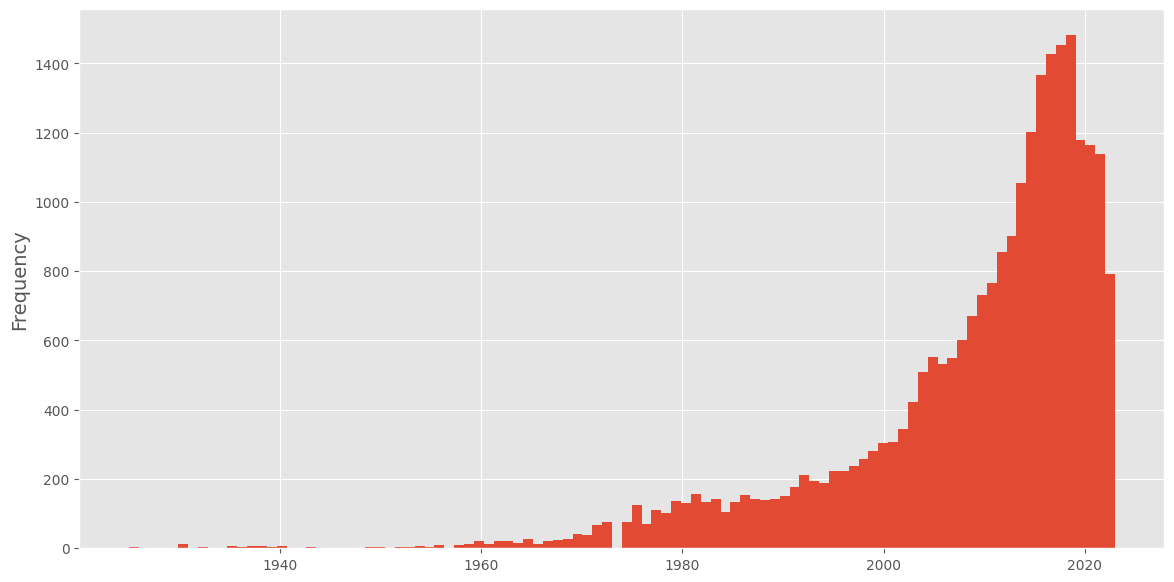

In [17]:
filt = df['year'].between(1924, 2023)
df.loc[filt, 'year'].plot(kind='hist', bins=100);

In [18]:
df.sort_values('users_rated').head(30)

,id,name,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,awards,expansions,min_age,link,description,price_euro
25446,397912,Mischief & Malice TCG,2024,30,9.83333,0.00000,0.0000,2,7,903,0,0,2,4,NaN,NaN,NaN,NaN,10,60,0,0,13,/boardgame/397912/mischief-malice-tcg,Players face off while trying to survive Misch...,NaN
19613,256398,Game to Pick a Game: Orc Council,2018,30,6.55000,5.50728,0.0000,213,6,7692,63,0,2,4,NaN,NaN,NaN,NaN,5,5,0,3,5,/boardgame/256398/game-pick-game-orc-council,NaN,NaN
19601,314115,Clue: The Golden Girls,2017,30,6.05333,5.50733,2.0000,161,4,4298,22,1,2,6,2.0,2.0,2.0,2.0,60,60,0,0,8,/boardgame/314115/clue-golden-girls,"The game of Clue with a ""The Golden Girls"" TV ...",NaN
19557,93039,The Racing Horse Game,0,30,6.13600,5.50757,1.0000,81,1,24890,48,0,2,11,NaN,NaN,NaN,NaN,20,20,0,0,10,/boardgame/93039/racing-horse-game,NaN,NaN
19495,266353,Oh Fruck!,2018,30,6.30000,5.50781,0.0000,145,1,5052,75,1,2,6,NaN,NaN,NaN,NaN,10,30,0,0,12,/boardgame/266353/oh-fruck,NaN,NaN
19488,211212,Bearly Working,2017,30,6.15333,5.50785,1.3333,86,7,6680,43,0,2,4,4.0,4.0,4.0,4.0,20,35,0,0,10,/boardgame/211212/bearly-working,NaN,NaN
19433,136912,Los Incognitos: Alien iacta est,2013,30,6.15333,5.50805,1.5000,48,2,10149,46,0,2,4,NaN,NaN,NaN,NaN,20,20,0,0,8,/boardgame/136912/los-incognitos-alien-iacta-est,NaN,NaN
19432,184311,Fliegenschmaus,2015,30,6.03333,5.50805,1.5000,84,1,5673,202,0,2,4,2.0,4.0,3.0,4.0,15,20,1,0,6,/boardgame/184311/fliegenschmaus,NaN,NaN
23472,23291,Sioux,2006,30,4.41667,5.48314,1.3333,185,0,11536,33,0,3,5,NaN,NaN,NaN,NaN,45,45,1,0,9,/boardgame/23291/sioux,NaN,NaN
19372,160904,Memorable Stories,2014,30,6.21667,5.50831,1.0000,51,2,4684,54,0,3,8,5.0,8.0,6.0,6.0,30,30,0,0,8,/boardgame/160904/memorable-stories,NaN,NaN


In [19]:
df.sort_values('users_rated', ascending=False).head()

,id,name,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,awards,expansions,min_age,link,description,price_euro
529,13,CATAN,1995,123038,7.10166,6.92751,2.2978,197665,6581,4532098,351236,1906,3,4,3.0,4.0,4.0,4.0,60,120,15,94,10,/boardgame/13/catan,Collect and trade resources to build up the is...,29.00
213,822,Carcassonne,2000,122831,7.40968,7.29690,1.8965,186562,7083,4551517,594843,3428,2,5,2.0,5.0,2.0,2.0,30,45,13,179,7,/boardgame/822/carcassonne,"Shape the medieval landscape of France, claimi...",33.44
133,30549,Pandemic,2008,121943,7.54348,7.43862,2.4015,195126,7510,4552021,406324,1313,2,4,1.0,4.0,4.0,4.0,45,45,41,8,8,/boardgame/30549/pandemic,Your team of experts must prevent the world fr...,130.90
88,68448,7 Wonders,2010,101574,7.69111,7.58350,2.3180,137350,6607,4683358,569776,2087,2,7,3.0,7.0,4.0,5.0,30,30,53,27,10,/boardgame/68448/7-wonders,Draft cards to develop your ancient civilizati...,35.99
5,167791,Terraforming Mars,2016,93846,8.36745,8.22246,3.2591,129915,9232,8206322,576488,4200,1,5,1.0,4.0,3.0,3.0,120,120,40,39,12,/boardgame/167791/terraforming-mars,Compete with rival CEOs to make Mars habitable...,NaN


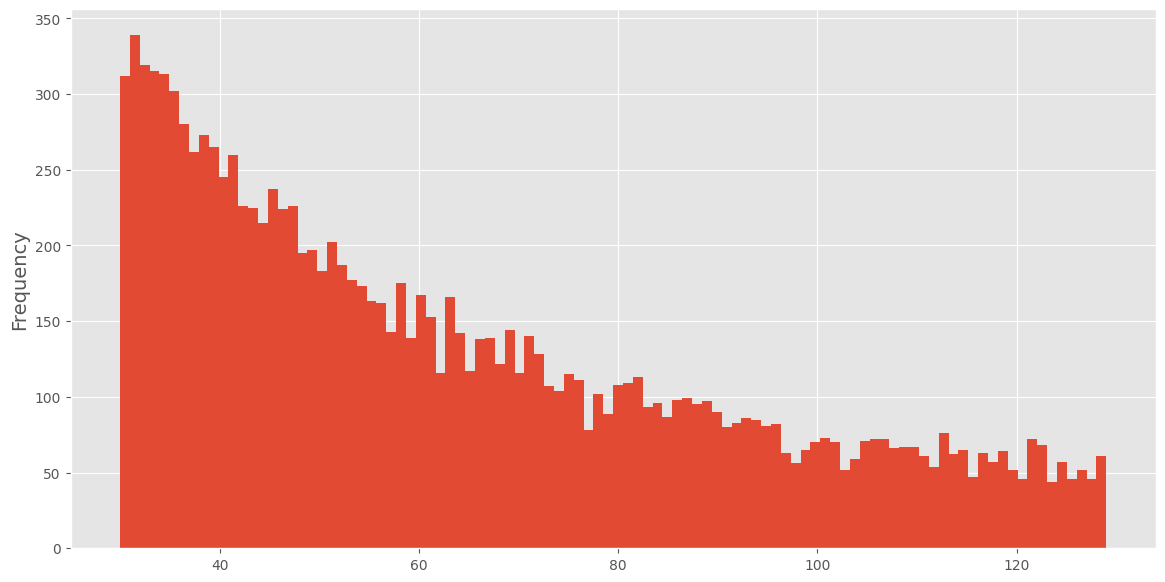

In [20]:
filt = df['users_rated'] < 130
df.loc[filt, 'users_rated'].plot(kind='hist', bins=100);

In [21]:
filt = df['users_rated'] < 50
print(sum(filt))
df[filt].sort_values('owned', ascending=False).head(30)

5230


,id,name,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,awards,expansions,min_age,link,description,price_euro
21233,170511,Slap .45 Mini,2014,44,5.48864,5.49974,1.0000,629,2,8681,49,0,3,7,NaN,NaN,NaN,NaN,20,20,0,0,10,/boardgame/170511/slap-45-mini,NaN,NaN
11229,398162,MicroMacro: Crime City – Showdown,2023,48,7.99952,5.55384,1.0000,608,8,8741,451,251,1,4,1.0,4.0,2.0,2.0,15,45,0,1,12,/boardgame/398162/micromacro-crime-city-showdown,Numerous new crimes in the city.,NaN
11351,361195,Monster Hunter World: The Board Game – Wildspi...,2022,47,7.97340,5.55244,3.0000,554,3,4920,65,2,1,4,3.0,4.0,3.0,3.0,60,90,0,3,14,/boardgame/361195/monster-hunter-world-board-g...,Fight new monsters and try out new weapons in ...,NaN
13102,387836,Star Wars Villainous: Scum and Villainy,2023,39,8.05128,5.53811,0.0000,524,19,22504,42,3,2,3,NaN,NaN,NaN,NaN,50,50,0,0,10,/boardgame/387836/star-wars-villainous-scum-an...,"Boba Fett, Cad Bane and Seventh Sister attempt...",NaN
12137,355786,Funkoverse Strategy Game: Universal Monsters 100,2022,47,7.51773,5.54522,0.0000,493,9,8327,55,2,2,4,NaN,NaN,NaN,NaN,20,60,0,6,10,/boardgame/355786/funkoverse-strategy-game-uni...,Your favorite Universal Monsters are scaring u...,NaN
20171,257197,TOKYO COIN LAUNDRY,2019,34,5.70882,5.50472,2.0000,453,9,26452,58,0,1,6,NaN,NaN,NaN,NaN,5,60,0,0,14,/boardgame/257197/tokyo-coin-laundry,"Play an RPG, wargame, dexterity, or strategy g...",NaN
10778,342948,"Downfall: Conquest of the Third Reich, 1942-1945",2023,44,8.64545,5.55865,2.7143,451,37,54892,46,14,2,2,1.0,2.0,2.0,2.0,360,720,0,0,14,/boardgame/342948/downfall-conquest-third-reic...,Vie for post-WWII dominance as the Western All...,NaN
20254,304937,They Live: Assault on Cable 54,2022,39,6.27915,5.50435,3.6667,416,37,34316,64,2,1,6,1.0,1.0,4.0,4.0,120,200,0,0,13,/boardgame/304937/they-live-assault-cable-54,NaN,NaN
21190,245528,Grimslingers: Advanced Duels,2018,46,5.48870,5.49999,1.0000,389,1,13509,51,0,1,2,NaN,NaN,NaN,NaN,10,20,0,0,14,/boardgame/245528/grimslingers-advanced-duels,NaN,NaN
15750,336632,Funkoverse Strategy Game: Space Jam A New Lega...,2021,40,7.12250,5.52401,0.0000,373,4,6992,25,0,2,2,NaN,NaN,NaN,NaN,20,60,0,6,10,/boardgame/336632/funkoverse-strategy-game-spa...,"What's up, Doc? Bugs Bunny and Lebron James jo...",NaN


In [22]:
df.sort_values('avg_rating', ascending=False).head(10)

,id,name,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,awards,expansions,min_age,link,description,price_euro
25446,397912,Mischief & Malice TCG,2024,30,9.83333,0.00000,0.0000,2,7,903,0,0,2,4,NaN,NaN,NaN,NaN,10,60,0,0,13,/boardgame/397912/mischief-malice-tcg,Players face off while trying to survive Misch...,NaN
14595,380844,Altar: Realms of the gods,2023,46,9.73043,5.52944,2.0000,26,86,7575,1,0,2,5,4.0,5.0,4.0,5.0,30,30,0,0,14,/boardgame/380844/altar-realms-gods,Build Shrines and find hidden Altars as you fi...,NaN
15739,330584,Eldfall Chronicles,2023,30,9.66333,5.52404,3.6667,87,139,33979,18,1,1,4,1.0,4.0,2.0,2.0,30,120,0,0,14,/boardgame/330584/eldfall-chronicles,Clash with your opponents or terrible beasts a...,NaN
12959,394217,Shadows of Brimstone: The Impossible Hell Train,2024,45,9.64889,5.53898,3.0000,20,282,7792,0,0,1,4,1.0,4.0,1.0,4.0,120,120,0,5,12,/boardgame/394217/shadows-brimstone-impossible...,All aboard for danger!,NaN
13352,394218,Shadows of Brimstone: Lost Tombs of Khamuntet,2024,47,9.53617,5.53661,3.0000,20,315,19025,2,0,1,4,1.0,4.0,1.0,4.0,120,120,0,10,12,/boardgame/394218/shadows-brimstone-lost-tombs...,"Sun, sand, and...danger?!",NaN
7890,165694,The Cones of Dunshire,0,74,9.51081,5.60690,4.6765,20,70,514644,5,0,8,12,6.0,12.0,10.0,10.0,0,0,0,0,0,/boardgame/165694/cones-dunshire,It's all about the cones.,NaN
13673,405772,Blooming Field,2024,32,9.47812,5.53461,0.0000,2,6,703,2,2,1,4,NaN,NaN,NaN,NaN,20,30,0,0,8,/boardgame/405772/blooming-field,Draft the right flower and calculate your step...,NaN
12007,373576,Die Festung Hamburg,2022,40,9.47250,5.54627,4.2000,200,24,15006,50,0,1,4,1.0,4.0,2.0,2.0,180,600,0,0,16,/boardgame/373576/die-festung-hamburg,NATO vs. Warsaw Pact in the North German Plain,NaN
13335,368557,HeroScape: Age of Annihilation,0,77,9.44156,5.53671,2.5000,30,164,42343,3,0,2,4,2.0,4.0,2.0,2.0,0,0,0,0,0,/boardgame/368557/heroscape-age-annihilation,HeroScape returns to the table with new figure...,NaN
20756,228370,TerroriXico,2018,70,9.41429,5.50210,2.3333,39,26,13996,47,0,2,4,4.0,4.0,4.0,4.0,20,30,0,0,10,/boardgame/228370/terrorixico,NaN,NaN


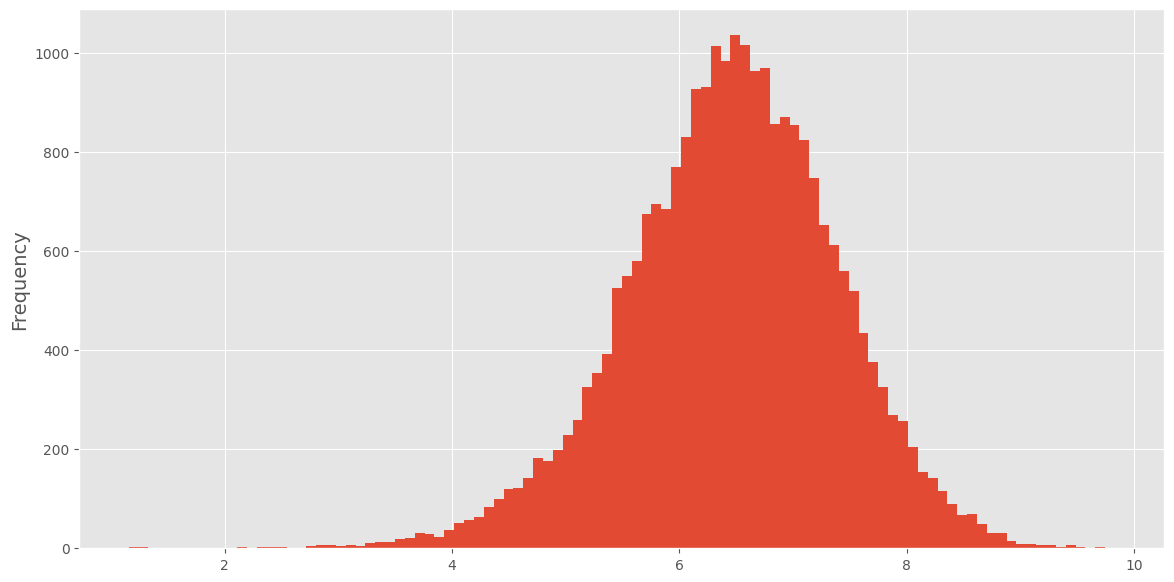

In [23]:
df['avg_rating'].plot(kind='hist', bins=100);

In [24]:
df[df['geek_rating'] == 0]

,id,name,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,awards,expansions,min_age,link,description,price_euro
25446,397912,Mischief & Malice TCG,2024,30,9.83333,0.0,0.0,2,7,903,0,0,2,4,NaN,NaN,NaN,NaN,10,60,0,0,13,/boardgame/397912/mischief-malice-tcg,Players face off while trying to survive Misch...,NaN


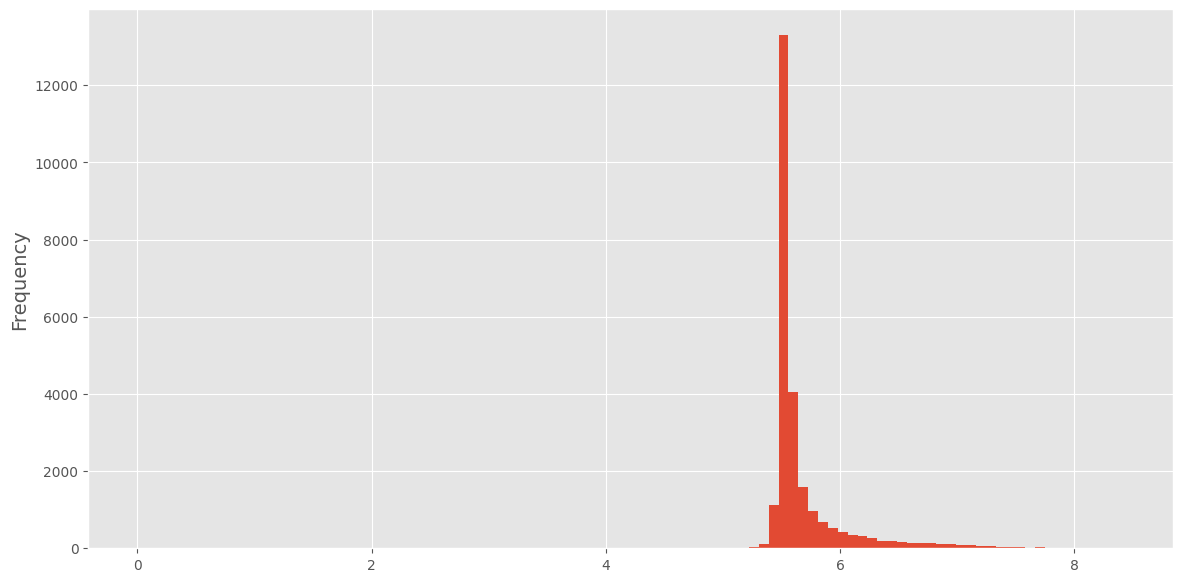

In [25]:
df['geek_rating'].plot(kind='hist', bins=100);

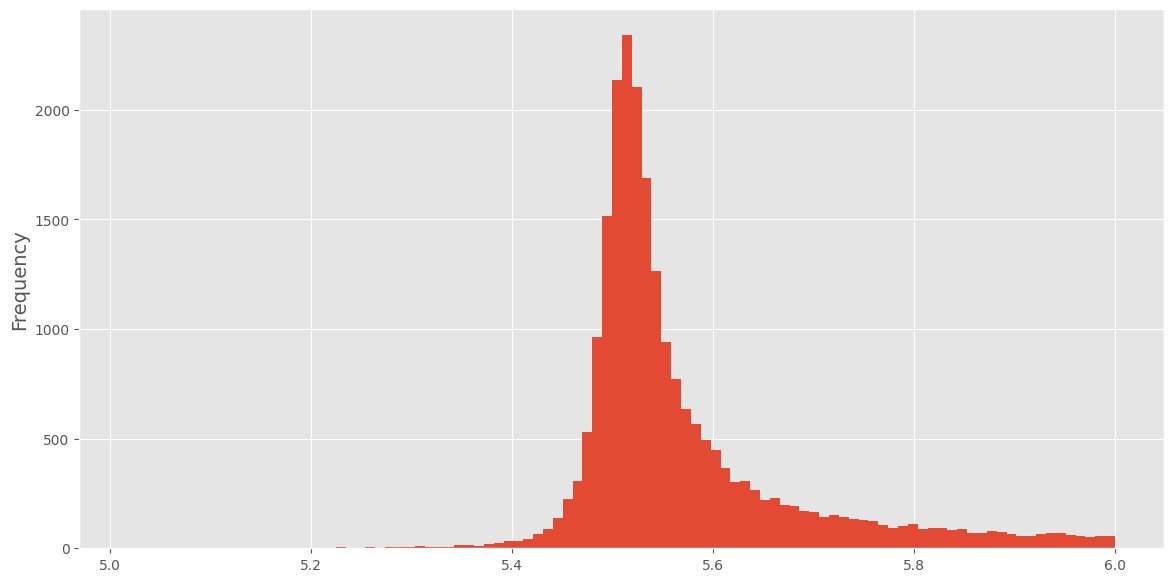

In [26]:
filt = df['geek_rating'].between(5, 6)
df.loc[filt, 'geek_rating'].plot(kind='hist', bins=100);

In [27]:
filt = df['weight'] == 0
print(sum(filt))
df[filt].sort_values('owned', ascending=False)

376


,id,name,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,awards,expansions,min_age,link,description,price_euro
9391,198029,Flip City: Wilderness,2016,283,6.20165,5.57791,0.0,1104,2,6651,493,0,1,4,NaN,NaN,NaN,NaN,30,50,0,1,8,/boardgame/198029/flip-city-wilderness,NaN,NaN
7807,303036,Funkoverse Strategy Game: Jaws 100,2020,144,7.47514,5.60943,0.0,1059,12,20615,67,1,2,2,NaN,NaN,NaN,NaN,20,60,0,6,10,/boardgame/303036/funkoverse-strategy-game-jaw...,"Compare your scars with Quint, if Jaws doesn't...",12.95
11687,300076,PARKS Memories: Plains Walker,2021,147,6.25096,5.54893,0.0,869,14,24247,247,2,2,8,NaN,NaN,NaN,NaN,30,30,0,0,6,/boardgame/300076/parks-memories-plains-walker,Try to remember hidden images featuring US Nat...,NaN
12413,316850,Gloomier: A Night at Hemlock Hall,2022,64,7.17383,5.54302,0.0,825,7,18182,99,8,2,5,NaN,NaN,NaN,NaN,45,60,0,1,14,/boardgame/316850/gloomier-night-hemlock-hall,"Compete to tell the most tragic tale, while ke...",NaN
9638,165521,Rory's Story Cubes: Medic,2014,144,6.61667,5.57394,0.0,754,5,11894,241,1,1,10,NaN,NaN,NaN,NaN,20,20,0,0,6,/boardgame/165521/rorys-story-cubes-medic,NaN,NaN
11508,267506,Gloom of Thrones,2019,93,6.77634,5.55074,0.0,714,7,20657,141,1,2,4,NaN,NaN,NaN,NaN,60,60,0,0,14,/boardgame/267506/gloom-thrones,NaN,NaN
10259,332018,Funkoverse Strategy Game: Alice in Wonderland 100,2021,94,7.16596,5.56484,0.0,704,8,10812,75,0,2,2,NaN,NaN,NaN,NaN,20,60,0,6,0,/boardgame/332018/funkoverse-strategy-game-ali...,Do you play croquet? Alice and The Queen of He...,NaN
11086,165523,Rory's Story Cubes: Score,2014,119,6.51009,5.55548,0.0,638,6,11660,280,1,1,10,NaN,NaN,NaN,NaN,20,20,0,0,6,/boardgame/165523/rorys-story-cubes-score,NaN,NaN
8562,232956,Omen: Fires in the East,2019,97,7.44495,5.59248,0.0,545,45,29516,125,1,2,2,2.0,2.0,2.0,2.0,30,30,0,3,12,/boardgame/232956/omen-fires-east,NaN,NaN
13102,387836,Star Wars Villainous: Scum and Villainy,2023,39,8.05128,5.53811,0.0,524,19,22504,42,3,2,3,NaN,NaN,NaN,NaN,50,50,0,0,10,/boardgame/387836/star-wars-villainous-scum-an...,"Boba Fett, Cad Bane and Seventh Sister attempt...",NaN


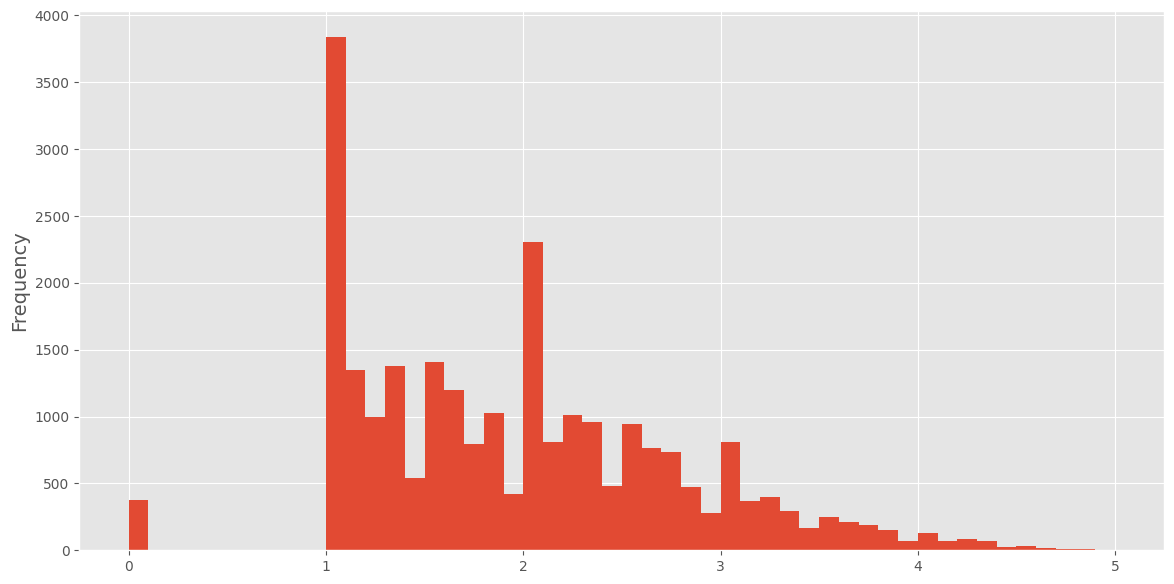

In [28]:
df['weight'].plot(kind='hist', bins=50);

In [29]:
df.sort_values('owned', ascending=False).head(10)

,id,name,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,awards,expansions,min_age,link,description,price_euro
529,13,CATAN,1995,123038,7.10166,6.92751,2.2978,197665,6581,4532098,351236,1906,3,4,3.0,4.0,4.0,4.0,60,120,15,94,10,/boardgame/13/catan,Collect and trade resources to build up the is...,29.00
133,30549,Pandemic,2008,121943,7.54348,7.43862,2.4015,195126,7510,4552021,406324,1313,2,4,1.0,4.0,4.0,4.0,45,45,41,8,8,/boardgame/30549/pandemic,Your team of experts must prevent the world fr...,130.90
213,822,Carcassonne,2000,122831,7.40968,7.29690,1.8965,186562,7083,4551517,594843,3428,2,5,2.0,5.0,2.0,2.0,30,45,13,179,7,/boardgame/822/carcassonne,"Shape the medieval landscape of France, claimi...",33.44
17,173346,7 Wonders Duel,2015,89124,8.09640,7.97233,2.2272,146409,4728,3057289,463780,4672,2,2,2.0,2.0,2.0,2.0,30,30,24,7,10,/boardgame/173346/7-wonders-duel,Science? Military? What will you draft to win ...,22.80
127,178900,Codenames,2015,88043,7.55063,7.45838,1.2642,145904,2462,2656488,558162,2740,2,8,4.0,8.0,6.0,6.0,15,15,45,34,14,/boardgame/178900/codenames,Give your team clever one-word clues to help t...,17.99
88,68448,7 Wonders,2010,101574,7.69111,7.58350,2.3180,137350,6607,4683358,569776,2087,2,7,3.0,7.0,4.0,5.0,30,30,53,27,10,/boardgame/68448/7-wonders,Draft cards to develop your ancient civilizati...,35.99
72,230802,Azul,2017,84264,7.75762,7.64709,1.7604,133451,4038,3062481,603243,7042,2,4,2.0,4.0,2.0,2.0,30,45,47,5,8,/boardgame/230802/azul,Artfully embellish the walls of your palace by...,44.52
24,266192,Wingspan,2019,85437,8.06442,7.91588,2.4572,132048,7265,4177362,571683,7438,1,5,1.0,4.0,3.0,3.0,40,70,42,5,10,/boardgame/266192/wingspan,Attract a beautiful and diverse collection of ...,64.73
5,167791,Terraforming Mars,2016,93846,8.36745,8.22246,3.2591,129915,9232,8206322,576488,4200,1,5,1.0,4.0,3.0,3.0,120,120,40,39,12,/boardgame/167791/terraforming-mars,Compete with rival CEOs to make Mars habitable...,NaN
228,9209,Ticket to Ride,2004,86753,7.39582,7.28049,1.8327,124613,4031,3014896,347832,2773,2,5,2.0,5.0,4.0,4.0,30,60,26,165,8,/boardgame/9209/ticket-ride,Build your railroad across North America to co...,36.99


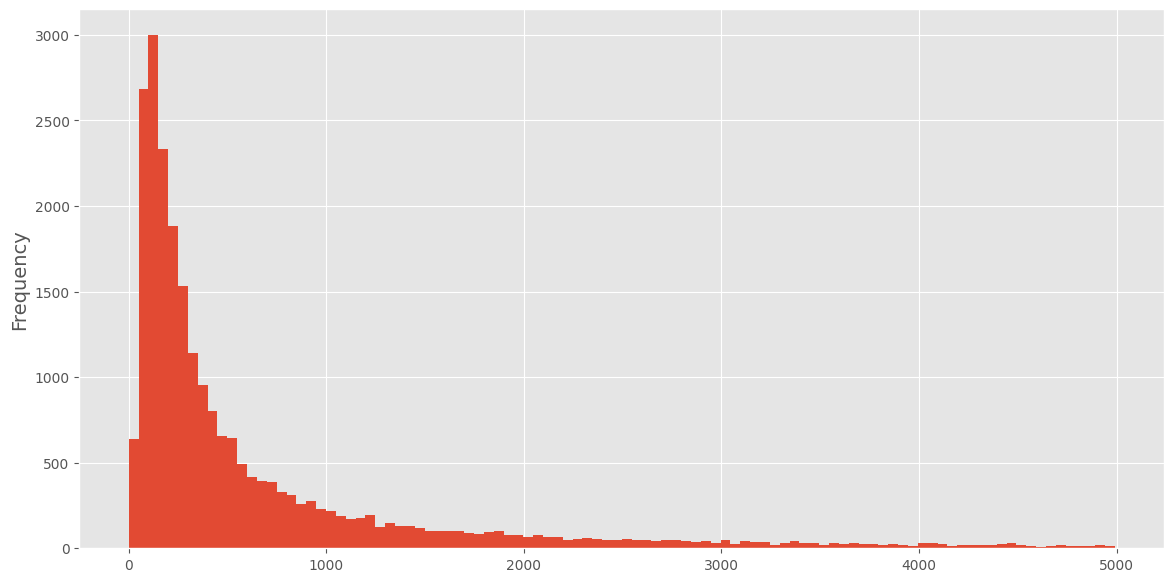

In [30]:
filt = df['owned'] < 5000
df.loc[filt, 'owned'].plot(kind='hist', bins=100);

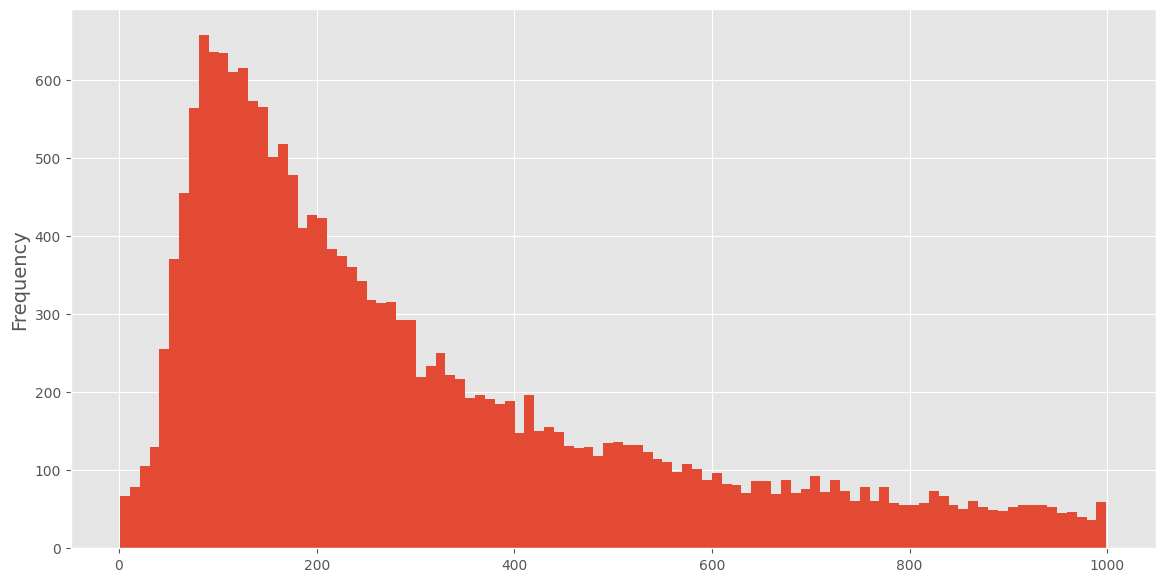

In [31]:
filt = df['owned'] < 1000
df.loc[filt, 'owned'].plot(kind='hist', bins=100);

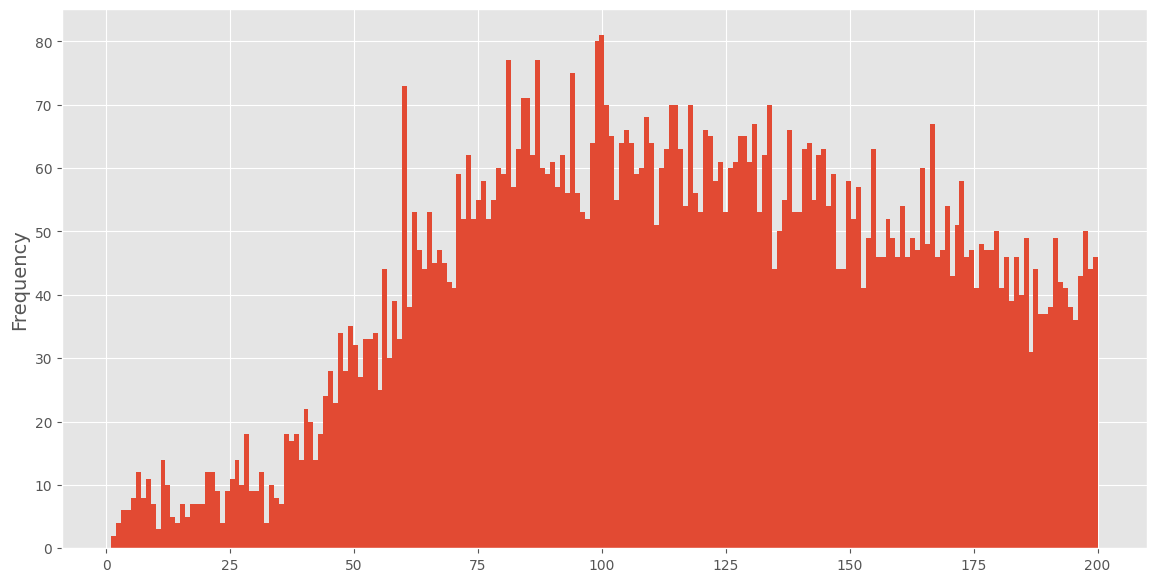

In [32]:
filt = df['owned'] <= 200
df.loc[filt, 'owned'].plot(kind='hist', bins=200);

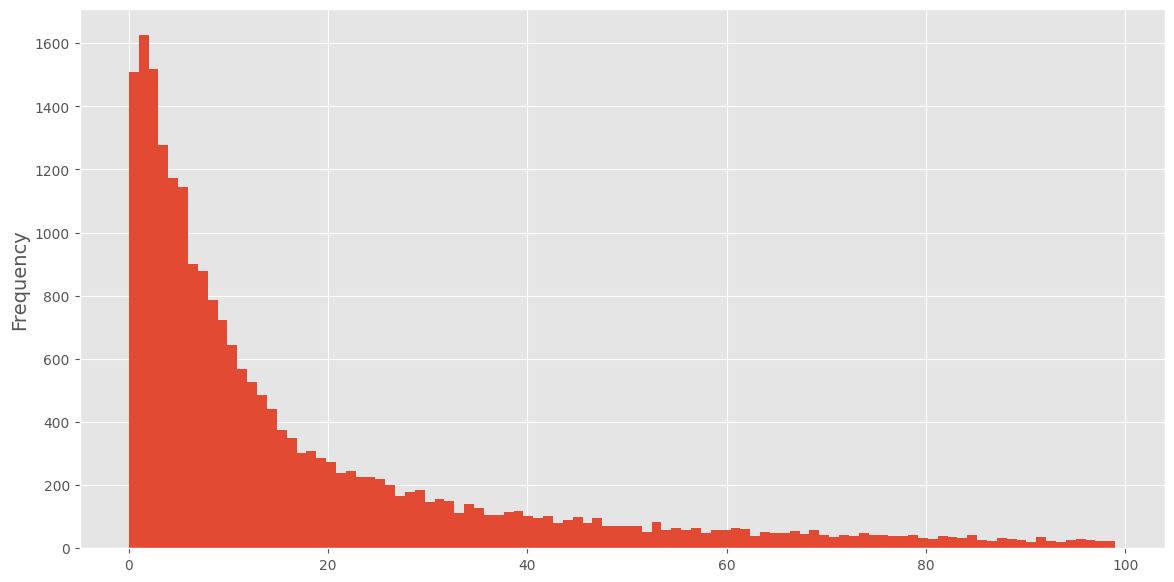

In [33]:
filt = df['fans'] < 100
df.loc[filt, 'fans'].plot(kind='hist', bins=100);

In [34]:
df.sort_values('views', ascending=False).head(10)

,id,name,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,awards,expansions,min_age,link,description,price_euro
2,174430,Gloomhaven,2017,60179,8.60779,8.37347,3.8993,93956,9588,12637821,494649,1991,1,4,1.0,4.0,3.0,3.0,60,120,30,17,14,/boardgame/174430/gloomhaven,Vanquish monsters with strategic cardplay. Ful...,NaN
5,167791,Terraforming Mars,2016,93846,8.36745,8.22246,3.2591,129915,9232,8206322,576488,4200,1,5,1.0,4.0,3.0,3.0,120,120,40,39,12,/boardgame/167791/terraforming-mars,Compete with rival CEOs to make Mars habitable...,NaN
26,205637,Arkham Horror: The Card Game,2016,41301,8.13537,7.90584,3.5294,72722,5091,7754376,283616,2499,1,2,1.0,2.0,2.0,2.0,60,120,15,104,14,/boardgame/205637/arkham-horror-card-game,Investigate the horrors of Arkham while courti...,58.12
16,169786,Scythe,2016,79649,8.15877,8.00609,3.4428,108256,8458,7624350,282597,1684,1,5,1.0,5.0,4.0,4.0,90,115,33,16,14,/boardgame/169786/scythe,"Five factions vie for dominance in a war-torn,...",78.92
10,162886,Spirit Island,2017,47361,8.35080,8.14974,4.0628,70907,5371,5671861,271960,4038,1,4,1.0,4.0,2.0,2.0,90,120,16,18,13,/boardgame/162886/spirit-island,Island Spirits join forces using elemental pow...,89.95
12,12333,Twilight Struggle,2005,47598,8.25168,8.07681,3.6054,66440,4797,5615455,123525,393,2,2,2.0,2.0,2.0,2.0,120,180,13,10,13,/boardgame/12333/twilight-struggle,Relive the Cold War and rewrite history in an ...,91.90
25438,2921,The Game of Life,1960,12710,4.33639,4.34619,1.1662,21210,246,5501528,18949,32,2,6,2.0,6.0,4.0,4.0,60,60,0,0,8,/boardgame/2921/game-of-life,Travel down life's road with its highs and low...,NaN
48,31260,Agricola,2007,71425,7.88354,7.75971,3.6371,84093,6331,5474415,271514,555,1,5,1.0,5.0,3.0,4.0,30,150,36,31,12,/boardgame/31260/agricola,Build your farmstead by sowing fields and rais...,46.99
71,55690,Kingdom Death: Monster,2015,9361,8.50433,7.65940,4.2661,12454,3025,5407204,47906,286,1,4,1.0,4.0,4.0,4.0,60,180,6,122,17,/boardgame/55690/kingdom-death-monster,Try to survive in a nightmarish world that lie...,NaN
32,96848,Mage Knight Board Game,2011,32583,8.08517,7.85759,4.3556,44664,4594,5131794,74483,179,1,4,1.0,3.0,1.0,2.0,60,240,12,4,14,/boardgame/96848/mage-knight-board-game,"Build your hero’s spells, abilities, and artif...",135.90


In [35]:
df.sort_values('views').head(10)

,id,name,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,awards,expansions,min_age,link,description,price_euro
13673,405772,Blooming Field,2024,32,9.47812,5.53461,0.0,2,6,703,2,2,1,4,NaN,NaN,NaN,NaN,20,30,0,0,8,/boardgame/405772/blooming-field,Draft the right flower and calculate your step...,NaN
25446,397912,Mischief & Malice TCG,2024,30,9.83333,0.00000,0.0,2,7,903,0,0,2,4,NaN,NaN,NaN,NaN,10,60,0,0,13,/boardgame/397912/mischief-malice-tcg,Players face off while trying to survive Misch...,NaN
18054,404268,Elin River Cruise,2023,32,7.41875,5.51404,2.6,4,11,1072,4,1,1,2,2.0,2.0,2.0,2.0,10,20,0,0,8,/boardgame/404268/elin-river-cruise,Riverboat captains appease their peculiar pass...,NaN
14623,367089,Clash of Decks: Deliquescence,2022,35,7.61429,5.52931,0.0,338,0,1106,26,0,1,2,NaN,NaN,NaN,NaN,15,15,0,2,15,/boardgame/367089/clash-decks-deliquescence,Two sorcerers fight over control of the most p...,NaN
20924,314746,Trivial Pursuit: Domówka,2019,32,5.56250,5.50130,0.0,92,1,1219,60,1,2,99,NaN,NaN,NaN,NaN,0,0,0,0,16,/boardgame/314746/trivial-pursuit-domowka,"Quick, funny and best for playing with friends...",NaN
18180,402503,Hex Wars,2024,31,8.66935,5.51350,0.0,4,10,1343,6,1,2,2,2.0,2.0,2.0,2.0,30,60,0,0,10,/boardgame/402503/hex-wars,A conflict between two rival factions - The Ki...,NaN
22298,296960,Divercité,2019,32,5.26562,5.49351,0.0,3,0,1354,43,1,2,2,NaN,NaN,NaN,NaN,20,20,0,0,8,/boardgame/296960/divercite,NaN,NaN
14823,369763,Clash of Decks: Elusive,2022,33,7.68182,5.52831,2.0,315,2,1391,53,0,1,2,NaN,NaN,NaN,NaN,30,8,0,3,15,/boardgame/369763/clash-decks-elusive,Create your army and battle other Lord-Sorcere...,NaN
14102,369764,Clash of Decks: Resistance,2022,36,7.70833,5.53215,0.0,316,2,1443,37,0,1,2,NaN,NaN,NaN,NaN,30,8,0,3,15,/boardgame/369764/clash-decks-resistance,Create your army and battle other Lord-Sorcere...,NaN
17289,306677,Wtedy kiedy,2018,30,6.78333,5.51715,1.0,47,0,1452,103,0,2,8,NaN,NaN,NaN,NaN,30,30,0,4,10,/boardgame/306677/wtedy-kiedy,NaN,NaN


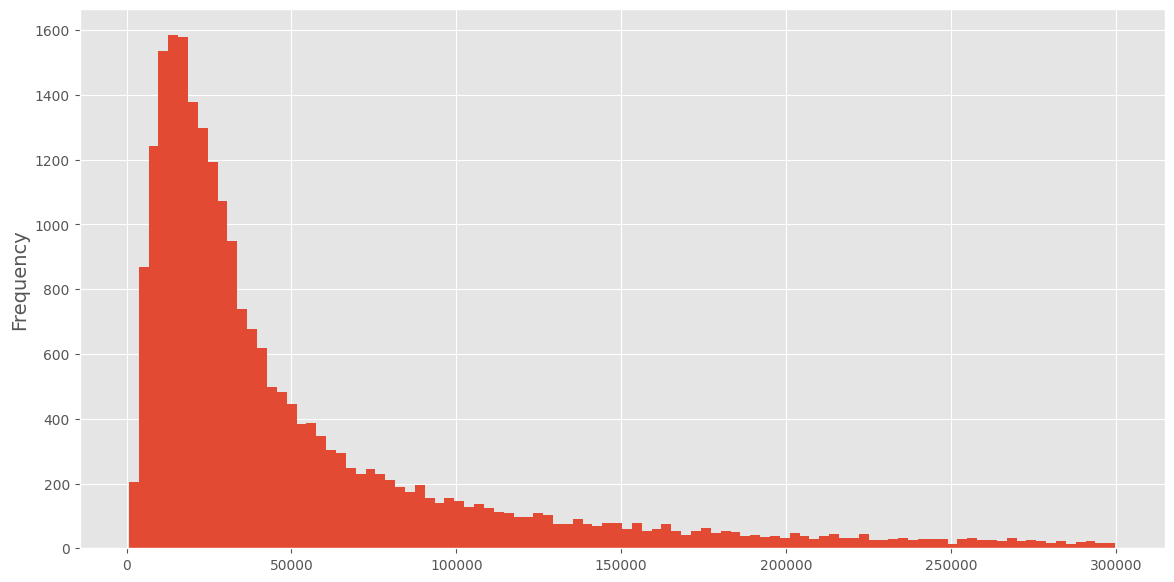

In [36]:
filt = df['views'] < 300000
df.loc[filt, 'views'].plot(kind='hist', bins=100);

In [37]:
print(sum(df['plays'] == 0))
df.sort_values('plays').head(30)

16


,id,name,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,awards,expansions,min_age,link,description,price_euro
25446,397912,Mischief & Malice TCG,2024,30,9.83333,0.00000,0.0000,2,7,903,0,0,2,4,NaN,NaN,NaN,NaN,10,60,0,0,13,/boardgame/397912/mischief-malice-tcg,Players face off while trying to survive Misch...,NaN
25091,99918,W.W.B,2011,40,1.43750,5.42298,3.0000,4,7,28567,0,0,2,2,NaN,NaN,1.0,1.0,0,0,0,0,0,/boardgame/99918/wwb,NaN,NaN
25236,240624,Overturn: Rising Sands,0,70,1.58571,5.38683,0.0000,4,44,80479,0,0,2,6,NaN,NaN,NaN,NaN,90,160,0,0,15,/boardgame/240624/overturn-rising-sands,NaN,NaN
23233,10626,Pacific War Classics Vol 1: Tarawa & Saipan,1992,37,4.61081,5.48556,2.6000,137,3,21386,0,0,2,2,1.0,2.0,2.0,2.0,180,180,0,0,12,/boardgame/10626/pacific-war-classics-vol-1-ta...,NaN,NaN
22273,3016,"Stand & Die: The Battle of Borodino, 1941",1991,60,5.43500,5.49365,3.5000,263,6,29281,0,0,2,2,NaN,NaN,1.0,2.0,240,240,0,0,12,/boardgame/3016/stand-die-battle-borodino-1941,NaN,NaN
18856,10797,"Hoorah! Six Bridges: The Battle of Pittsburgh,...",1996,33,6.32788,5.51054,2.2500,309,5,14521,0,0,2,2,1.0,2.0,2.0,2.0,180,180,0,0,12,/boardgame/10797/hoorah-six-bridges-battle-pit...,NaN,NaN
16772,14842,Battle for the Factories,1982,30,7.08667,5.51928,3.7143,133,7,20037,0,0,2,2,1.0,2.0,2.0,2.0,8,8,0,0,12,/boardgame/14842/battle-factories,NaN,NaN
10507,2627,Poisson d'Avril,1983,110,6.68710,5.56165,4.2143,47,22,62501,0,0,2,6,1.0,4.0,3.0,3.0,120,120,0,0,13,/boardgame/2627/poisson-davril,"A monument of ludic design, the Atlas upon whi...",NaN
22621,253048,Legends of Signum: Battle for Vallor,2018,46,6.60739,5.49111,0.0000,27,112,16424,0,0,2,4,2.0,2.0,2.0,2.0,30,90,0,0,12,/boardgame/253048/legends-signum-battle-vallor,NaN,NaN
18996,302679,Stormsunder: Heirs of Ruin,2023,41,6.77317,5.51000,3.6667,92,143,110280,0,0,1,4,1.0,3.0,1.0,1.0,45,90,0,5,16,/boardgame/302679/stormsunder-heirs-ruin,NaN,NaN


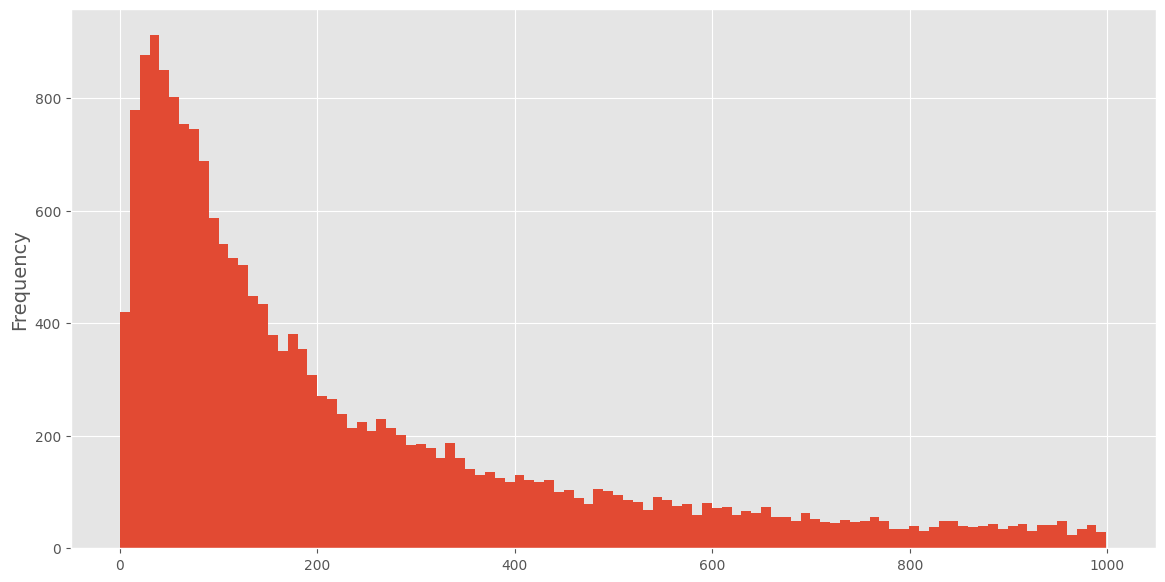

In [38]:
filt = df['plays'] < 1000
df.loc[filt, 'plays'].plot(kind='hist', bins=100);

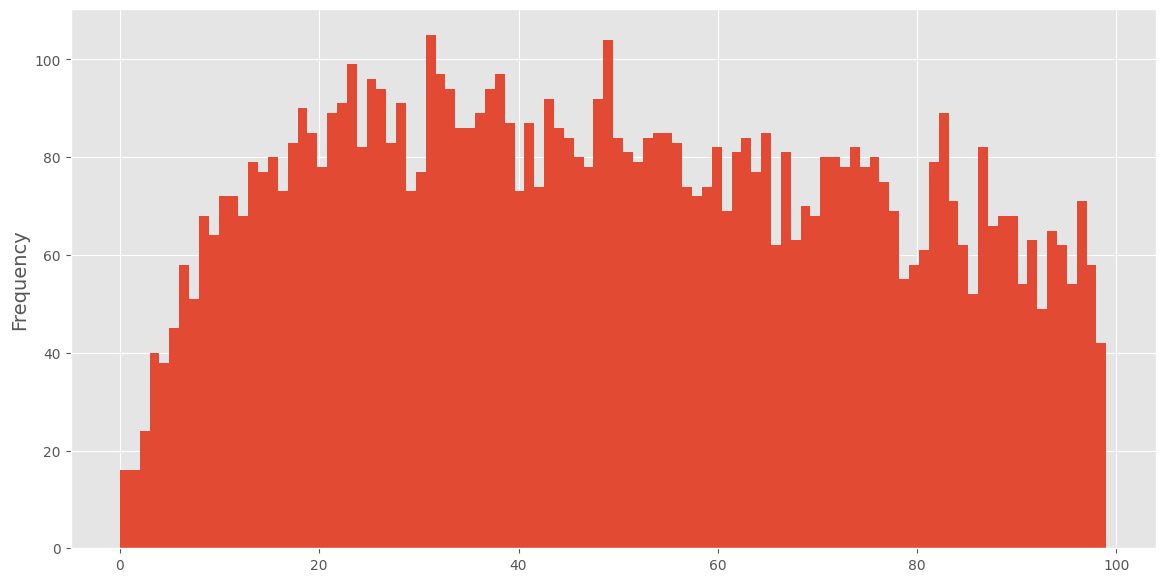

In [39]:
filt = df['plays'] < 100
df.loc[filt, 'plays'].plot(kind='hist', bins=100);

In [40]:
df[filt].sort_values('plays_month', ascending=False).head(30)

,id,name,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,awards,expansions,min_age,link,description,price_euro
14494,390903,Villagers of the Oak Dell,2023,43,8.02791,5.53001,2.0000,180,766,42600,89,75,1,100,NaN,NaN,NaN,NaN,20,40,0,0,10,/boardgame/390903/villagers-oak-dell,Strategize and manage your resources as you fo...,NaN
11823,359945,Guild Academies of Valeria,2023,41,7.76098,5.54782,3.0000,319,26,26085,88,74,1,4,NaN,NaN,NaN,NaN,90,120,0,1,14,/boardgame/359945/guild-academies-valeria,Guild Academies of Valeria is a puzzley engine...,NaN
15363,402208,Ku-Ka-König,2023,31,7.21290,5.52573,1.0000,46,2,3060,97,57,2,4,2.0,4.0,3.0,3.0,20,20,0,0,8,/boardgame/402208/ku-ka-konig,Which row of cards do you want? Choose it and ...,NaN
10933,309427,Total Domination,2023,67,7.66318,5.55699,3.2500,272,55,78877,94,52,1,4,2.0,2.0,2.0,2.0,60,120,0,0,10,/boardgame/309427/total-domination,Lead the Allies – or the Axis – to a total wor...,NaN
12267,371091,Mycelium: A Mushling Game,2023,69,7.65942,5.54415,2.5000,342,74,35261,97,50,2,4,3.0,4.0,4.0,4.0,60,105,0,1,13,/boardgame/371091/mycelium-mushling-game,Expand your mycelium network with the aid of t...,NaN
13576,340216,Heredity,2023,35,8.60571,5.53523,2.0000,89,23,9762,93,46,1,4,1.0,4.0,2.0,2.0,120,180,0,0,14,/boardgame/340216/heredity,Try to survive and protect your family in a po...,NaN
14069,393429,Critter Kitchen,2024,40,8.11875,5.53235,0.0000,76,151,33520,84,44,1,5,1.0,5.0,4.0,5.0,60,60,0,0,10,/boardgame/393429/critter-kitchen,Gather ingredients to satisfy food challenges ...,NaN
10929,380175,Halloween,2023,51,8.15507,5.55704,2.0000,152,53,33008,91,44,2,4,2.0,4.0,4.0,4.0,30,60,0,0,14,/boardgame/380175/halloween,Play as Michael Myers and stalk the other play...,NaN
13793,380784,Solar Titans,2023,45,8.23333,5.53397,2.3333,155,24,11914,54,44,1,4,1.0,2.0,2.0,2.0,30,60,0,0,14,/boardgame/380784/solar-titans,"Capital ships face off in tense, tactical spac...",NaN
16228,402109,PASS,2023,40,6.74750,5.52165,0.0000,78,6,3852,85,42,2,5,4.0,5.0,4.0,4.0,15,15,0,0,14,/boardgame/402109/pass,A ladder-climbing card game to let you be stro...,NaN


In [41]:
filt = df['plays_month'] <= 5
print(sum(filt))
df[filt].sort_values('plays', ascending=False).head(30)

18678


,id,name,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,awards,expansions,min_age,link,description,price_euro
482,25417,BattleLore,2006,9333,7.34904,6.95750,2.7652,11128,603,1576085,26477,5,2,2,2.0,2.0,2.0,2.0,60,60,9,16,10,/boardgame/25417/battlelore,"Battle through a Hundred Years War with magic,...",NaN
685,58281,Summoner Wars,2009,6570,7.23187,6.79538,2.3387,6029,660,1075755,26158,3,2,4,2.0,2.0,2.0,2.0,30,60,4,36,9,/boardgame/58281/summoner-wars,Summon units of your faction to fight and brin...,NaN
1645,122294,Ascension: Immortal Heroes,2012,1651,7.32072,6.30152,2.1071,3285,76,103842,15186,3,1,2,2.0,2.0,2.0,2.0,30,30,0,32,13,/boardgame/122294/ascension-immortal-heroes,Stand united and gain honor with soul gems and...,NaN
1587,43022,Yomi,2011,2958,6.93913,6.31898,2.3590,3072,334,511261,15093,1,2,2,2.0,2.0,2.0,2.0,30,30,2,1,10,/boardgame/43022/yomi,NaN,NaN
2242,88408,Nightfall,2011,3945,6.48241,6.13030,2.6371,5540,313,514811,13055,5,2,5,2.0,5.0,3.0,3.0,45,45,1,16,12,/boardgame/88408/nightfall,Werewolves fight for dominance in a chaotic et...,NaN
1078,158275,Marvel Dice Masters: Uncanny X-Men,2014,3814,7.15534,6.55789,2.3684,8058,248,254394,12883,1,2,2,2.0,2.0,2.0,2.0,60,60,1,30,14,/boardgame/158275/marvel-dice-masters-uncanny-...,"Wolverine, Magneto, Cyclops, Iceman, & more fa...",8.44
1673,40270,Call of Cthulhu: The Card Game,2008,3024,6.89691,6.29217,2.8945,5423,418,620373,10022,1,2,2,2.0,2.0,2.0,2.0,30,30,1,52,13,/boardgame/40270/call-cthulhu-card-game,Succeed at stories by facing down your opponen...,NaN
1384,9203,Wings of War: Famous Aces,2004,4728,6.85775,6.40831,1.7356,5803,193,512739,9321,2,2,4,2.0,4.0,4.0,4.0,20,20,3,8,10,/boardgame/9203/wings-war-famous-aces,World War One air combat brought to life with ...,NaN
1213,27364,Caylus Magna Carta,2007,4963,6.89334,6.48700,2.8704,6668,75,394814,8968,3,2,4,2.0,4.0,3.0,4.0,45,75,6,3,10,/boardgame/27364/caylus-magna-carta,"Build and use workers along an expanding road,...",NaN
1855,24742,Cold War: CIA vs KGB,2007,4140,6.62417,6.23293,1.8522,6430,164,323121,8689,3,2,2,2.0,2.0,2.0,2.0,30,60,4,0,12,/boardgame/24742/cold-war-cia-vs-kgb,The USA and the USSR are the only Superpowers ...,NaN


In [42]:
df[df['min_players'] > df['max_players']]

,id,name,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,awards,expansions,min_age,link,description,price_euro
4022,1585,"Burma: The Campaign in Northern Burma, 1944",1999,349,7.84462,5.82589,4.0185,1302,55,149855,377,0,1,0,1.0,NaN,1.0,NaN,60,3600,3,0,12,/boardgame/1585/burma-campaign-northern-burma-...,The famed OCS operational system covers the 19...,NaN
4981,85204,Kings of War,2012,267,7.78667,5.73729,2.5000,540,98,95689,794,3,2,0,NaN,NaN,1.0,NaN,60,60,0,6,0,/boardgame/85204/kings-war,NaN,NaN
5159,170669,Old School Tactical: Volume 1 – Fighting on th...,2016,229,8.18672,5.72534,2.7647,688,89,211704,234,2,2,0,1.0,NaN,1.0,NaN,60,60,0,4,0,/boardgame/170669/old-school-tactical-volume-1...,NaN,NaN
5328,25738,The Big Taboo,2006,833,6.30937,5.71434,1.5429,1921,17,52898,1272,8,4,0,NaN,NaN,NaN,NaN,30,60,0,0,12,/boardgame/25738/big-taboo,NaN,NaN
5511,252402,Kodama Duo,2018,414,6.75468,5.70265,1.8889,1713,60,46680,743,3,2,0,NaN,NaN,NaN,NaN,30,30,0,0,14,/boardgame/252402/kodama-duo,Place your cards right to grow the perfect tre...,NaN
5771,163097,Beyond the Rhine: The Campaign for Northwest E...,2015,179,8.39860,5.68745,4.4286,951,67,126182,247,0,2,0,1.0,NaN,1.0,NaN,3000,3000,0,0,15,/boardgame/163097/beyond-rhine-campaign-northw...,NaN,NaN
5778,135796,Next War: Taiwan,2014,201,7.90249,5.68714,4.2857,1021,77,147790,288,1,2,0,1.0,NaN,1.0,NaN,120,480,0,4,12,/boardgame/135796/next-war-taiwan,Explore a hypothetical near-future war scenari...,NaN
5887,37672,"Warhammer 40,000: Assault On Black Reach",2008,302,6.96378,5.68118,3.1250,815,29,92758,245,0,2,0,NaN,NaN,NaN,NaN,240,240,0,0,0,/boardgame/37672/warhammer-40000-assault-black...,NaN,NaN
6830,244170,Loup Garou,2015,240,6.87116,5.63926,1.1429,1045,14,43512,512,2,1,0,1.0,NaN,1.0,NaN,30,130,0,0,10,/boardgame/244170/loup-garou,"Your master, the mage Theodocred, charges you ...",NaN
7166,22479,HorrorClix,2006,403,6.47586,5.62846,2.3061,772,42,80154,362,0,2,0,NaN,NaN,NaN,NaN,60,60,1,2,12,/boardgame/22479/horrorclix,NaN,50.00


In [43]:
df[(df['min_players'] > df['max_players']) & (df['max_players'] != 0)]

,id,name,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,awards,expansions,min_age,link,description,price_euro


In [44]:
df.groupby('min_players')['id'].count()

min_players
0        49
1      5036
2     16880
3      2764
4       586
5        68
6        27
7        15
8        19
9         1
10        2
Name: id, dtype: int64

In [45]:
df.groupby('max_players')['id'].count()

max_players
0       166
1       521
2      4926
3       334
4      8113
5      3521
6      4595
7       362
8      1420
9        93
10      478
11       14
12      281
13        9
14       12
15       48
16       73
17        6
18       10
20       81
21        3
22        7
23        1
24       19
25        3
26        1
28        2
30       18
31        1
32        5
33        2
34        1
36       15
38        1
40        6
41        1
42        1
44        1
45        1
48        1
50        9
52        2
60        1
64        1
68        1
69        1
75        1
80        1
99      240
100      30
120       1
127       1
163       1
362       1
999       3
Name: id, dtype: int64

In [46]:
filt = (df['min_players'] == 0) | (df['max_players'] == 0)

df[filt].sort_values('owned', ascending=False)

,id,name,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,awards,expansions,min_age,link,description,price_euro
4338,23953,Outside the Scope of BGG,0,638,6.73628,5.79290,1.7000,3265,27,268537,15531,36,0,0,1.0,NaN,1.0,NaN,0,0,0,0,0,/boardgame/23953/outside-scope-bgg,Items or activities that are outside the scope...,NaN
3191,21804,Traditional Card Games,0,1115,6.77826,5.93703,1.9342,2426,68,90610,15688,81,0,0,1.0,NaN,1.0,NaN,0,0,0,0,0,/boardgame/21804/traditional-card-games,"An assortment of age-old games, played with a ...",NaN
5328,25738,The Big Taboo,2006,833,6.30937,5.71434,1.5429,1921,17,52898,1272,8,4,0,NaN,NaN,NaN,NaN,30,60,0,0,12,/boardgame/25738/big-taboo,NaN,NaN
5511,252402,Kodama Duo,2018,414,6.75468,5.70265,1.8889,1713,60,46680,743,3,2,0,NaN,NaN,NaN,NaN,30,30,0,0,14,/boardgame/252402/kodama-duo,Place your cards right to grow the perfect tre...,NaN
3350,18291,Unpublished Prototype,0,984,6.96062,5.91392,2.5325,1633,110,314899,138246,928,0,0,1.0,NaN,1.0,NaN,0,0,0,0,0,/boardgame/18291/unpublished-prototype,The game you can't buy because it hasn't been ...,NaN
3457,37301,Decktet,2008,525,7.41594,5.89658,2.0000,1555,148,235183,2165,0,0,0,1.0,NaN,1.0,NaN,30,30,2,0,0,/boardgame/37301/decktet,A six-suited deck of cards that can be used to...,NaN
4022,1585,"Burma: The Campaign in Northern Burma, 1944",1999,349,7.84462,5.82589,4.0185,1302,55,149855,377,0,1,0,1.0,NaN,1.0,NaN,60,3600,3,0,12,/boardgame/1585/burma-campaign-northern-burma-...,The famed OCS operational system covers the 19...,NaN
6500,5985,Miscellaneous Game Accessory,0,231,7.06900,5.65266,3.2174,1299,80,177623,358,0,0,0,1.0,NaN,1.0,NaN,0,0,0,0,0,/boardgame/5985/miscellaneous-game-accessory,All game accessories that can be used with any...,NaN
25288,193295,Drunk Stoned or Stupid: A Party Game,2014,283,4.36449,5.35972,1.0000,1226,5,121113,248,2,4,0,NaN,NaN,NaN,NaN,15,30,0,0,17,/boardgame/193295/drunk-stoned-or-stupid-party...,Name and shame your friends in this game of em...,NaN
6830,244170,Loup Garou,2015,240,6.87116,5.63926,1.1429,1045,14,43512,512,2,1,0,1.0,NaN,1.0,NaN,30,130,0,0,10,/boardgame/244170/loup-garou,"Your master, the mage Theodocred, charges you ...",NaN


In [47]:
df[df['max_players'] > 100].sort_values('plays_month', ascending=False)

,id,name,year,users_rated,avg_rating,geek_rating,weight,owned,fans,views,plays,plays_month,min_players,max_players,min_players_recomended,max_players_recomended,min_players_best,max_players_best,min_playtime,max_playtime,awards,expansions,min_age,link,description,price_euro
9026,24996,Start Player: A Kinda Collectible Card Game,2006,186,6.52987,5.58417,1.0000,303,9,34489,1812,1,2,999,2.0,31.0,2.0,31.0,1,1,0,0,6,/boardgame/24996/start-player-kinda-collectibl...,More ways to beat your friends and claim start...,NaN
7048,60815,Black Powder: Second Edition,2009,167,7.30692,5.63205,2.6000,445,44,49663,303,0,2,120,1.0,6.0,4.0,4.0,120,360,0,12,12,/boardgame/60815/black-powder-second-edition,NaN,NaN
10784,28567,"I Don't Know, What Do You Want to Play?",2007,88,6.80909,5.55858,1.0588,115,11,70796,118,0,2,999,2.0,7.0,4.0,5.0,5,5,0,0,8,/boardgame/28567/i-dont-know-what-do-you-want-...,NaN,NaN
12835,184462,Alchemidus,2015,100,6.29255,5.53995,1.5000,133,6,20018,255,0,1,127,8.0,8.0,8.0,8.0,30,30,0,0,10,/boardgame/184462/alchemidus,NaN,NaN
13139,189890,Scrimish,2015,300,5.87843,5.53790,1.1250,1119,14,32994,590,0,2,999,2.0,5.0,4.0,4.0,10,100,0,0,8,/boardgame/189890/scrimish,NaN,NaN
21138,24969,Pit Fighter: Fantasy Arena,2006,45,5.52222,5.50026,1.6667,201,2,35573,31,0,2,163,2.0,4.0,2.0,2.0,20,30,0,1,8,/boardgame/24969/pit-fighter-fantasy-arena,NaN,NaN
23686,3867,The Hammer of Thor: The Game of Norse Mythology,1980,63,5.00397,5.48071,3.4000,193,19,65874,10,0,1,362,NaN,NaN,NaN,NaN,120,120,0,0,12,/boardgame/3867/hammer-thor-game-norse-mythology,Up to 365 players can compete in this veritabl...,NaN


In [48]:
df.groupby('min_age')['id'].count()

min_age
0     1506
1        1
2       22
3      145
4      341
5      551
6     1157
7     1024
8     5181
9      400
10    4731
11     120
12    5490
13    1343
14    2692
15     185
16     248
17      83
18     212
19       1
21      14
Name: id, dtype: int64

# Filtering

I will remove records that are definitely irrelevant for the task:
* Unreliable rating (users_rated < 50)
* Unpublished (year > 2024) and old games, created before Monopoly (year < 1935)
* Games without important parametr - weight
* Unpopular and forgotten games (plays_month <= 5 or plays <= 100)
* Games without imortant parametrs - min_players / max_players

In [49]:
def filtering(df, filt, name):
    print(name, ': ', sum(~filt))
    print('Remain: ', sum(filt))
    print()
    return df[filt]


print(len(df))
print()

filt = df['users_rated'] >= 50
df = filtering(df, filt, 'Unreliable rating')

filt = df['year'].between(1935, 2023)
df = filtering(df, filt, 'Unpublished and old games')

filt = df['weight'] != 0
df = filtering(df, filt, 'Games without weight')

filt = (df['plays_month'] > 5) & (df['plays'] > 100)
df = filtering(df, filt, 'Unpopular and forgotten games')

filt = (df['min_players'] != 0) & (df['max_players'] != 0)
df = filtering(df, filt, 'Games without min_players / max_players')

25447

Unreliable rating :  5230
Remain:  20217

Unpublished and old games :  302
Remain:  19915

Games without weight :  115
Remain:  19800

Unpopular and forgotten games :  13552
Remain:  6248

Games without min_players / max_players :  3
Remain:  6245



# Filling NULLs

Just fill cells without reconended/best num of players.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6245 entries, 0 to 25443
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6245 non-null   int64  
 1   name                    6245 non-null   object 
 2   year                    6245 non-null   int64  
 3   users_rated             6245 non-null   int64  
 4   avg_rating              6245 non-null   float64
 5   geek_rating             6245 non-null   float64
 6   weight                  6245 non-null   float64
 7   owned                   6245 non-null   int64  
 8   fans                    6245 non-null   int64  
 9   views                   6245 non-null   int64  
 10  plays                   6245 non-null   int64  
 11  plays_month             6245 non-null   int64  
 12  min_players             6245 non-null   int64  
 13  max_players             6245 non-null   int64  
 14  min_players_recomended  6152 non-null  

In [51]:
df['min_players_recomended'] = df['min_players_recomended'].fillna(df['max_players_recomended'])
df['max_players_recomended'] = df['max_players_recomended'].fillna(df['min_players_recomended'])
df['min_players_best'] = df['min_players_best'].fillna(df['max_players_best'])
df['max_players_best'] = df['max_players_best'].fillna(df['min_players_best'])

df['min_players_recomended'] = df['min_players_recomended'].fillna(df['min_players']).astype(int)
df['max_players_recomended'] = df['max_players_recomended'].fillna(df['max_players']).astype(int)
df['min_players_best'] = df['min_players_best'].fillna(df['min_players_recomended']).astype(int)
df['max_players_best'] = df['max_players_best'].fillna(df['max_players_recomended']).astype(int)

sum(df['min_players_recomended'] > df['max_players_recomended']), sum(df['min_players_best'] > df['max_players_best'])

(0, 0)

# Saving data

* Save main df as is
* For additional data will remain only ID that present in main df

In [52]:
id_list = list(df['id'])

subdomain_df = subdomain_df[subdomain_df['id'].isin(id_list)].sort_values('id').reset_index(drop=True)
categories_df = categories_df[categories_df['id'].isin(id_list)].sort_values('id').reset_index(drop=True)
mechanics_df = mechanics_df[mechanics_df['id'].isin(id_list)].sort_values('id').reset_index(drop=True)

print(len(df), len(df['id'].unique()))
print(len(subdomain_df), len(subdomain_df['id'].unique()))
print(len(categories_df), len(categories_df['id'].unique()))
print(len(mechanics_df), len(mechanics_df['id'].unique()))

6245 6245
7037 6245
16870 6245
23103 6245


In [53]:
df.to_csv(r'final\01_boardgames_main.csv', index=False)
subdomain_df.to_csv(r'final\02_boardgames_subdomains.csv', index=False)
categories_df.to_csv(r'final\03_boardgames_categories.csv', index=False)
mechanics_df.to_csv(r'final\04_boardgames_mechanics.csv', index=False)